In [18]:
import matplotlib.pyplot as plot
import matplotlib.dates as dates
import pydata_google_auth
import pandas as pd
from google.cloud import bigquery

credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
)
project_id = 'apprenticeship-299321'
# hardcoding the pie chart keys and manually setting the colours to be consistent is really not the way I'd like to handle this
threeColorsArray = ['#FFC6FF', '#CAFFBF', '#FFD6A5'] # tablet, desktop, mobile
threeColorsArray1 = ['#FFC6FF', '#FFD6A5', '#CAFFBF'] # tablet, mobile, desktop
threeColorsArray2 = ['#FFD6A5', '#CAFFBF', '#FFC6FF'] # mobile, desktop, tablet
rainbowArray = ['#FFADAD', '#FFD6A5', '#FDFFB6', '#CAFFBF', '#9BF6FF', '#A0C4FF', '#BDB2FF', '#FFC6FF']
singleColorArray = ["#BDB2FF"]

def runQuery(queryName):
    query = pd.read_gbq(queryName, project_id=project_id, dialect='standard', credentials=credentials)
    print(query)
    return query


In [85]:
# sample query to re-check what data is about
query = """
    SELECT * FROM apprenticeship-299321.sample_data.datatable
    ORDER BY date ASC, channelGrouping, deviceCategory
    LIMIT 40
"""
runQuery(query)

# this is a complete day
#         date channelGrouping deviceCategory  sessions  conversions
# 0   20170101         (Other)        desktop        32            2
# 1   20170101         (Other)         mobile        14            0
# 2   20170101         (Other)         tablet        21            1
# 3   20170101     Aggregators        desktop        23            1
# 4   20170101     Aggregators         mobile        21            1
# 5   20170101     Aggregators         tablet        15            1
# 6   20170101          Direct        desktop       937           62
# 7   20170101          Direct         mobile       983           17
# 8   20170101          Direct         tablet       307           11
# 9   20170101         Display        desktop       207           13
# 10  20170101         Display         mobile        11            0
# 11  20170101         Display         tablet       213           13
# 12  20170101           Email        desktop       412           23
# 13  20170101           Email         mobile       678           14
# 14  20170101           Email         tablet       177            7
# 15  20170101  Organic Search        desktop      2302           47
# 16  20170101  Organic Search         mobile      4580          123
# 17  20170101  Organic Search         tablet      1670           73
# 18  20170101     Paid Search        desktop        89            4
# 19  20170101     Paid Search         mobile       296           10
# 20  20170101     Paid Search         tablet        91            5
# 21  20170101        Referral        desktop      1434           44
# 22  20170101        Referral         mobile      2025           45
# 23  20170101        Referral         tablet       738           25
# 24  20170101     Retargeting        desktop         2            0
# 25  20170101     Retargeting         mobile         4            0
# 26  20170101     Retargeting         tablet         1            0
# 27  20170101          Social        desktop        12            1
# 28  20170101          Social         mobile        62            1
# 29  20170101          Social         tablet        10            0

        date channelGrouping deviceCategory  sessions  conversions
0   20170101         (Other)        desktop        32            2
1   20170101         (Other)         mobile        14            0
2   20170101         (Other)         tablet        21            1
3   20170101     Aggregators        desktop        23            1
4   20170101     Aggregators         mobile        21            1
5   20170101     Aggregators         tablet        15            1
6   20170101          Direct        desktop       937           62
7   20170101          Direct         mobile       983           17
8   20170101          Direct         tablet       307           11
9   20170101         Display        desktop       207           13
10  20170101         Display         mobile        11            0
11  20170101         Display         tablet       213           13
12  20170101           Email        desktop       412           23
13  20170101           Email         mobile       678         

,date,channelGrouping,deviceCategory,sessions,conversions
0,20170101,(Other),desktop,32,2
1,20170101,(Other),mobile,14,0
2,20170101,(Other),tablet,21,1
3,20170101,Aggregators,desktop,23,1
4,20170101,Aggregators,mobile,21,1
5,20170101,Aggregators,tablet,15,1
6,20170101,Direct,desktop,937,62
7,20170101,Direct,mobile,983,17
8,20170101,Direct,tablet,307,11
9,20170101,Display,desktop,207,13


  deviceCategory  deviceCategoryCount
0         tablet                 5216
1        desktop                 5263
2         mobile                 5368


<AxesSubplot:ylabel='deviceCategoryCount'>

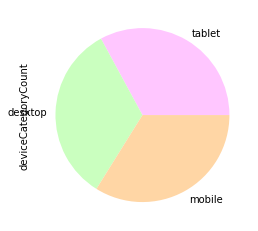

In [3]:
# TODO: title axes properly
# TODO: should this be SUM(sessions)?
query2 = """
    SELECT deviceCategory, COUNT(*) AS deviceCategoryCount
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY deviceCategoryCount ASC
"""
runQuery(query2).plot.pie(x='deviceCategory', y='deviceCategoryCount', colors=threeColorsArray, legend=False, labels=["tablet", "desktop", "mobile"])

In [24]:
# for testing CONVERT and CAST - can delete
# #legacySQL
query21 = """
    SELECT deviceCategory, CAST(COUNT(*) AS string) AS deviceCategoryCount
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY deviceCategoryCount ASC
"""
runQuery(query21)
# runQuery(query2).plot.pie(x='deviceCategory', y='deviceCategoryCount', colors=threeColorsArray, legend=False, labels=["tablet", "desktop", "mobile"])
print("...")
query81 = """
    SELECT LEFT(CAST(date AS string), 4) AS dateString, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY dateString
    ORDER BY dateString ASC
"""
runQuery(query81)
# so I can confirm that it's casting properly etc.

  deviceCategory deviceCategoryCount
0         tablet                5216
1        desktop                5263
2         mobile                5368
...
  dateString  conversionRate
0       2017          0.0359
1       2018          0.0370


,dateString,conversionRate
0,2017,0.0359
1,2018,0.0370


     channelGrouping  channelGroupingCount
0         Newsletter                   503
1   Partner referral                   503
2       Email alerts                   516
3        Retargeting                  1085
4            Display                  1216
5              Email                  1475
6            (Other)                  1491
7             Social                  1501
8        Aggregators                  1501
9        Paid Search                  1511
10            Direct                  1515
11          Referral                  1515
12    Organic Search                  1515


<AxesSubplot:xlabel='channelGrouping'>

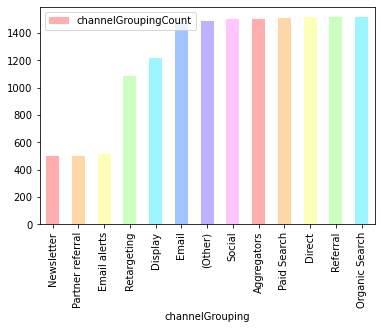

In [4]:
# again, re-evaluate whether this should be SUM - what does the data represent?
query3 = """
    SELECT channelGrouping, COUNT(*) AS channelGroupingCount
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY channelGrouping
    ORDER BY channelGroupingCount ASC
"""
runQuery(query3).plot.bar(x='channelGrouping', y='channelGroupingCount', color=rainbowArray)

In [5]:
# # query4 = """
# #     SELECT date, SUM(sessions) AS numberOfSessions
# #     FROM `apprenticeship-299321.sample_data.datatable`
# #     GROUP BY date
# #     ORDER BY date ASC
# # """
# query4 = """
#     SELECT PARSE_DATETIME('%s', CAST(TRUNC(event_timestamp/1000000) AS STRING)) AS numberOfSessions
#     FROM apprenticeship-299321.sample_data.datatable
#     GROUP BY date
#     ORDER BY date ASC
# """
# runQuery(query4).plot.bar(x='date', y='numberOfSessions', color=singleColorArray)

  deviceCategory  averageConversionsPerDeviceCategory
0         tablet                                 20.4
1         mobile                                 38.6
2        desktop                                 53.7


<AxesSubplot:ylabel='averageConversionsPerDeviceCategory'>

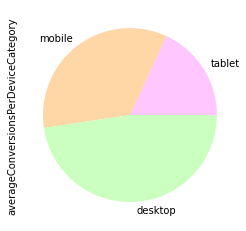

In [6]:
# this is rounded to 1 decimal place, while other data is rounded to 4 -
# this is because ideally I'd have used significant figures
query5 = """
    SELECT deviceCategory, ROUND(AVG(conversions), 1) as averageConversionsPerDeviceCategory
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY averageConversionsPerDeviceCategory
"""
runQuery(query5).plot.pie(y='averageConversionsPerDeviceCategory', colors=threeColorsArray1, legend=False, labels=["tablet", "mobile", "desktop"])

  deviceCategory  conversionRatePerDeviceCategory
0         mobile                           0.0261
1        desktop                           0.0430
2         tablet                           0.0551


<AxesSubplot:ylabel='conversionRatePerDeviceCategory'>

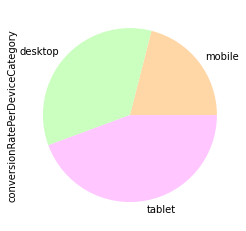

In [7]:
query6 = """
    SELECT deviceCategory, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRatePerDeviceCategory
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY conversionRatePerDeviceCategory
"""
# TODO: colours correspond to first, second and third - should really represent the same device
runQuery(query6).plot.pie(x='deviceCategory', y='conversionRatePerDeviceCategory', normalize=True, colors=threeColorsArray2, legend=False, labels=["mobile", "desktop", "tablet"])

     channelGrouping  conversionRatePerChannelGrouping
0             Social                            0.0287
1            (Other)                            0.0344
2         Newsletter                            0.0350
3        Paid Search                            0.0350
4             Direct                            0.0354
5              Email                            0.0357
6        Aggregators                            0.0358
7       Email alerts                            0.0358
8     Organic Search                            0.0368
9           Referral                            0.0370
10       Retargeting                            0.0387
11  Partner referral                            0.0399
12           Display                            0.0444


<AxesSubplot:xlabel='channelGrouping'>

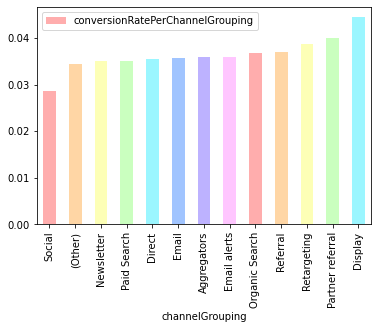

In [8]:
query7 = """
    SELECT channelGrouping, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRatePerChannelGrouping
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY channelGrouping
    ORDER BY conversionRatePerChannelGrouping
"""
runQuery(query7).plot.bar(x='channelGrouping', y='conversionRatePerChannelGrouping', color=rainbowArray)


    dateFormat  conversionRate
0   2017-01-01          0.0313
1   2017-01-02          0.0308
2   2017-01-03          0.0372
3   2017-01-04          0.0317
4   2017-01-05          0.0400
..         ...             ...
500 2018-05-16          0.0399
501 2018-05-17          0.0345
502 2018-05-18          0.0390
503 2018-05-19          0.0342
504 2018-05-20          0.0382

[505 rows x 2 columns]


<AxesSubplot:xlabel='dateFormat'>

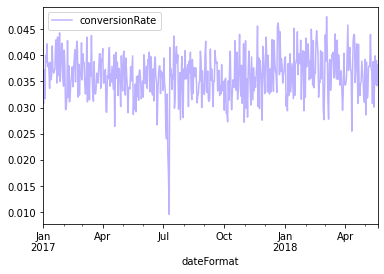

In [80]:
# SET @YearString = LEFT(CAST(date AS string), 4)

# query8 = """
#     DECLARE YearString STRING;
#     SET YearString = LEFT(CAST(date AS string), 4);
#     SELECT CAST(date AS string) AS dateString, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
#     FROM `apprenticeship-299321.sample_data.datatable`
#     GROUP BY dateString
#     ORDER BY dateString ASC
# """

# query8 = """
#     SELECT CAST(date AS string) AS dateString, LEFT(CAST(date AS string), 4) AS yearString, SUBSTRING(CAST(date AS string), 4, 6) AS monthString, RIGHT(CAST(date AS string), 2) AS dayString, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
#     FROM `apprenticeship-299321.sample_data.datatable`
#     GROUP BY dateString
#     ORDER BY dateString ASC
# """

# query8 = """
#     SELECT CAST(date AS string) AS dateString, 
#         LEFT(CAST(date AS string), 4) AS yearString, 
#         SUBSTRING(CAST(date AS string), 5, 2) AS monthString, 
#         RIGHT(CAST(date AS string), 2) AS dayString, 
#         CONCAT(yearString, "-", monthString, "-", "dayString") AS dateStringWithHyphens,
#         ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
#     FROM `apprenticeship-299321.sample_data.datatable`
#     GROUP BY dateString, yearString, monthString, dayString, dateStringWithHyphens
#     ORDER BY dateString ASC
# """

# query8 = """
#     SELECT CAST(date AS string) AS dateString, 
#         LEFT(CAST(date AS string), 4) AS yearString, 
#         SUBSTRING(CAST(date AS string), 5, 2) AS monthString, 
#         RIGHT(CAST(date AS string), 2) AS dayString, 
#         CONCAT(LEFT(CAST(date AS string), 4), "-", 
#             SUBSTRING(CAST(date AS string), 5, 2), "-", 
#             RIGHT(CAST(date AS string), 2)) AS dateStringWithHyphens,
#         DATE_FORMAT(CONCAT(LEFT(CAST(date AS string), 4), "-", 
#             SUBSTRING(CAST(date AS string), 5, 2), "-", 
#             RIGHT(CAST(date AS string), 2)), "%d %M %Y"),
#         ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
#     FROM `apprenticeship-299321.sample_data.datatable`
#     GROUP BY dateString, yearString, monthString, dayString, dateStringWithHyphens
#     ORDER BY dateString ASC
# """

# query8 = """
#     SELECT CAST(date AS string) AS dateString, 
#         LEFT(CAST(date AS string), 4) AS yearString, 
#         SUBSTRING(CAST(date AS string), 5, 2) AS monthString, 
#         RIGHT(CAST(date AS string), 2) AS dayString, 
#         CONCAT(LEFT(CAST(date AS string), 4), "-", 
#             SUBSTRING(CAST(date AS string), 5, 2), "-", 
#             RIGHT(CAST(date AS string), 2)) AS dateStringWithHyphens,
            
#         DATE(CAST(LEFT(CAST(date AS string), 4) AS INT64), 
#             CAST(SUBSTRING(CAST(date AS string), 5, 2) AS INT64), 
#             CAST(RIGHT(CAST(date AS string), 2) AS INT64)) AS dateFormat,
            
#         ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
#     FROM `apprenticeship-299321.sample_data.datatable`
#     GROUP BY dateString, yearString, monthString, dayString, dateStringWithHyphens, dateFormat
#     ORDER BY dateString ASC
# """

query8 = """
    SELECT DATE(CAST(LEFT(CAST(date AS string), 4) AS INT64), 
            CAST(SUBSTRING(CAST(date AS string), 5, 2) AS INT64), 
            CAST(RIGHT(CAST(date AS string), 2) AS INT64)) AS dateFormat, 
        ROUND((AVG(conversions))/(AVG(sessions)), 4) AS conversionRate
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY dateFormat
    ORDER BY dateFormat ASC
"""
runQuery(query8).plot.line(x='dateFormat', y='conversionRate', color=singleColorArray)


    dateFormat  totalSessions
0   2017-01-01          17367
1   2017-01-02          27842
2   2017-01-03          42792
3   2017-01-04          42956
4   2017-01-05          43019
..         ...            ...
500 2018-05-16          32012
501 2018-05-17          26716
502 2018-05-18          22831
503 2018-05-19          14260
504 2018-05-20          17993

[505 rows x 2 columns]


<AxesSubplot:xlabel='dateFormat'>

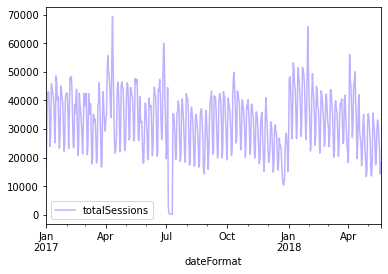

In [75]:
query9 = """
    SELECT DATE(CAST(LEFT(CAST(date AS string), 4) AS INT64), 
            CAST(SUBSTRING(CAST(date AS string), 5, 2) AS INT64), 
            CAST(RIGHT(CAST(date AS string), 2) AS INT64)) AS dateFormat,
        SUM(sessions) as totalSessions
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY dateFormat
    ORDER BY dateFormat ASC
"""

runQuery(query9).plot.line(x='dateFormat', y='totalSessions', color=singleColorArray)

    dateFormat  totalConversions
0   2017-01-01               544
1   2017-01-02               857
2   2017-01-03              1590
3   2017-01-04              1361
4   2017-01-05              1719
..         ...               ...
500 2018-05-16              1278
501 2018-05-17               922
502 2018-05-18               891
503 2018-05-19               488
504 2018-05-20               688

[505 rows x 2 columns]


<AxesSubplot:xlabel='dateFormat'>

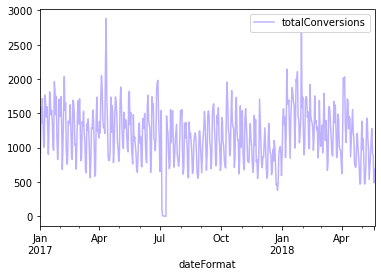

In [76]:
query10 = """
    SELECT DATE(CAST(LEFT(CAST(date AS string), 4) AS INT64), 
            CAST(SUBSTRING(CAST(date AS string), 5, 2) AS INT64), 
            CAST(RIGHT(CAST(date AS string), 2) AS INT64)) AS dateFormat,
        SUM(conversions) AS totalConversions
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY dateFormat
    ORDER BY dateFormat ASC
"""
runQuery(query10).plot.line(x='dateFormat', y='totalConversions', color=singleColorArray)

  deviceCategory  sumChannelGrouping
0         tablet                5216
1        desktop                5263
2         mobile                5368


<AxesSubplot:ylabel='sumChannelGrouping'>

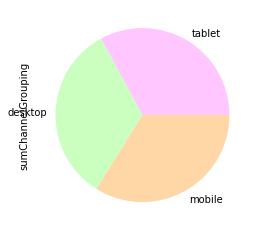

In [77]:
query10 = """
    SELECT deviceCategory, COUNT(channelGrouping) AS sumChannelGrouping
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY sumChannelGrouping ASC
"""
runQuery(query10).plot.pie(x='deviceCategory', y='sumChannelGrouping', colors=threeColorsArray, legend=False, labels=["tablet", "desktop", "mobile"])

   conversionRateFor2017
0                 0.0359
   conversionRateFor2018
0                  0.037


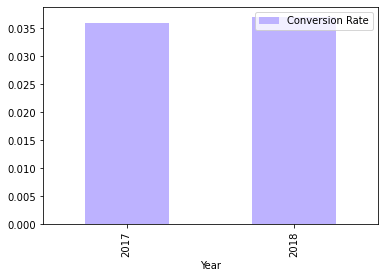

In [78]:
# conversion rates for each year
query11 = """
    SELECT ROUND((AVG(conversions))/(AVG(sessions)), 4) AS conversionRateFor2017
    FROM apprenticeship-299321.sample_data.datatable
    WHERE date<20180000
"""
conversionRateFor2017 = runQuery(query11)

query12 = """
    SELECT ROUND((AVG(conversions))/(AVG(sessions)), 4) AS conversionRateFor2018
    FROM apprenticeship-299321.sample_data.datatable
    WHERE date>20180000
"""
conversionRateFor2018 = runQuery(query12)

# TODO: change conversionRateFor2017 and conversionRateFor2018 variable types
# so that the code below works and you don't have to hardcode the data
# data = {"Year":[2017, 2018], "Conversion Rate":[conversionRateFor2017, conversionRateFor2018]};
# dataFrame= pd.DataFrame(data=data)
# dataFrame.plot.bar(x="Year", y="Conversion Rate")
# plot.show(block=True)

data = {"Year":[2017, 2018], "Conversion Rate":[0.0359, 0.0370]};
dataFrame= pd.DataFrame(data=data)
dataFrame.plot.bar(x="Year", y="Conversion Rate", color=singleColorArray)
plot.show(block=True)